#### **GOAL IS TO SHOW IF THERE IS LINEAR RELATIONSHIP BETWEEN HEIGHT AND SHOE SIZE - USING YELLOWBRICK**

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from yellowbrick.features import Rank2D, JointPlotVisualizer
from yellowbrick.regressor import ResidualsPlot, PredictionError, ManualAlphaSelection, CooksDistance
from yellowbrick.model_selection import cv_scores, LearningCurve, FeatureImportances, ValidationCurve
import pandas as pd
import numpy as np

In [12]:
# GET THE CURRENT WORKING DIRECTORY SO YOU CAN LOAD THE PATH TO THE WO_MEN.XLSX FILE
import os
os.getcwd()

'c:\\Users\\uri\\Documents\\Char Cap\\yellowbrick\\examples\\regressionVisuals'

##### **DATASET WAS TAKEN FROM https://osf.io/ja9dw/ AND CONVERTED TO AMERICAN SHOE SIZES MANUALLY. SEE OTHER TABS IN WO_MEN.XLSX

In [13]:
# YOU WILL HAVE TO INSTALL OPENPYXL - pip install openpyxl - TO BE ABLE TO OPEN EXCEL FILES WITH PANDAS
df = pd.read_excel('data/wo_men.xlsx', sheet_name='wo_men')


In [14]:
df.head(2)

,time,sex,height,shoe_size - German,height in feet - String,height in inches,Height in Feet,BinarySex,shoe_size-american
0,04.10.2016 17:58:51,woman,160.0,40.0,"5'3""",62.992126,5.249344,1,8.0
1,04.10.2016 17:58:59,woman,171.0,39.0,"5'7""",67.322835,5.610236,1,7.0


In [15]:
ds = df.drop(['time', 'sex', 'height', 'shoe_size - German', 'height in feet - String', 'height in inches'], axis=1)
ds.shape

(99, 3)

In [16]:
ds.columns

Index(['Height in Feet', 'BinarySex', 'shoe_size-american'], dtype='object')

In [17]:
X = ds.drop(['shoe_size-american'], axis=1)
y = ds['shoe_size-american']


##### Women is coded as 1 vs Man being 0 so that's why there is negative correlation between sex and shoe size

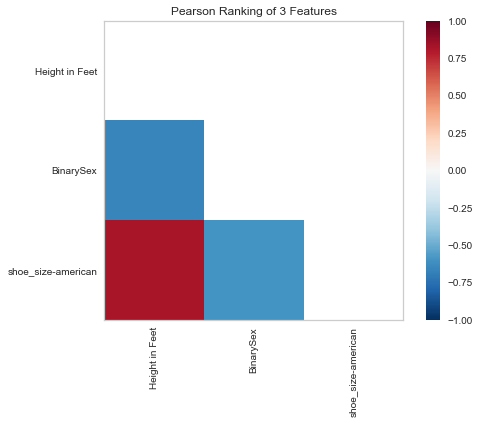

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

In [18]:
viz = Rank2D(algorithm='pearson')
viz.fit_transform(ds)
viz.show()

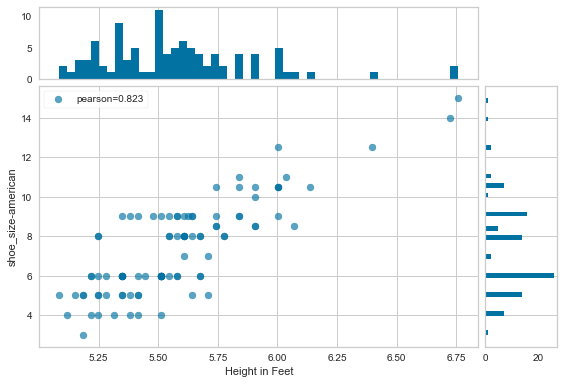

<AxesSubplot:xlabel='Height in Feet', ylabel='shoe_size-american'>

In [19]:
viz = JointPlotVisualizer(columns=['Height in Feet', 'shoe_size-american'])
viz.fit_transform(ds)
viz.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

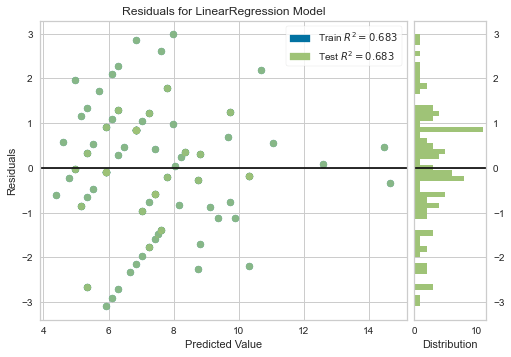

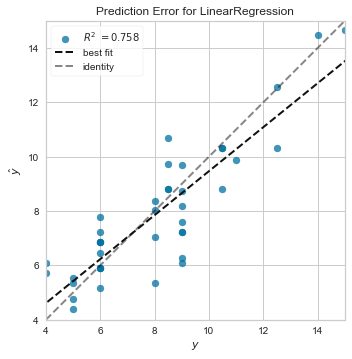

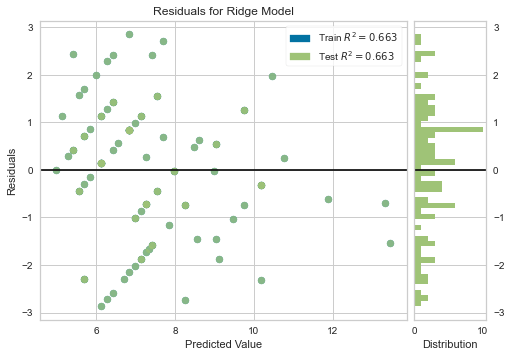

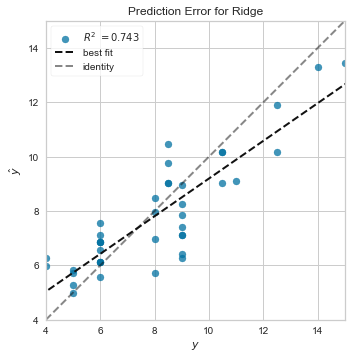

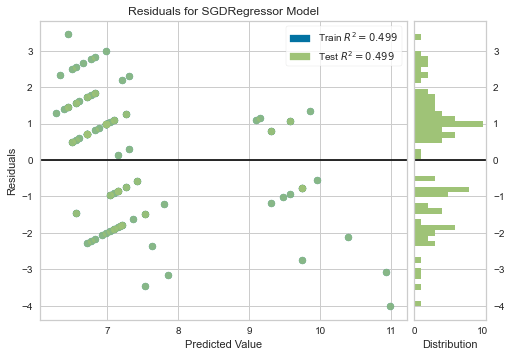

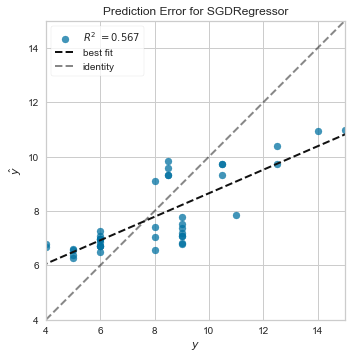

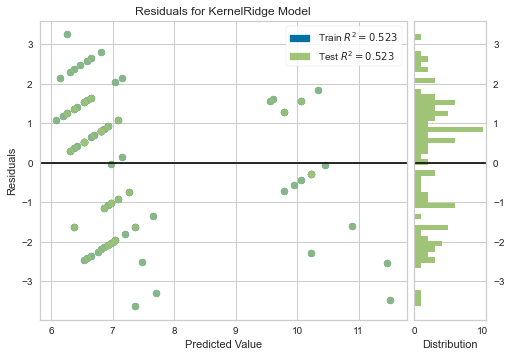

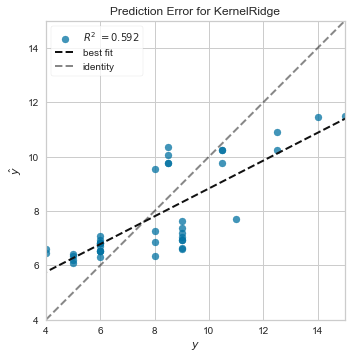

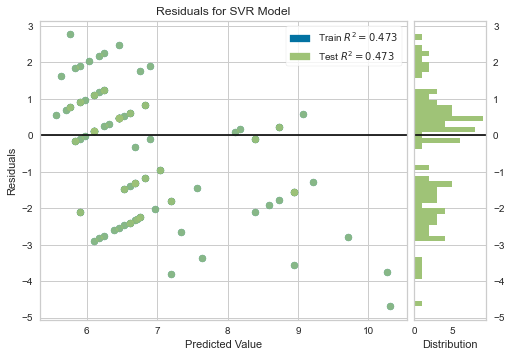

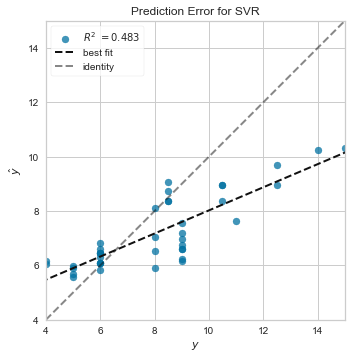

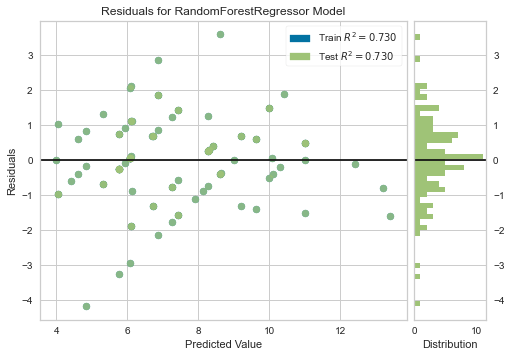

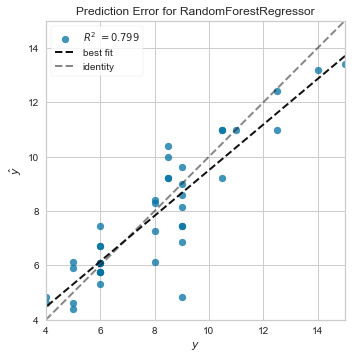

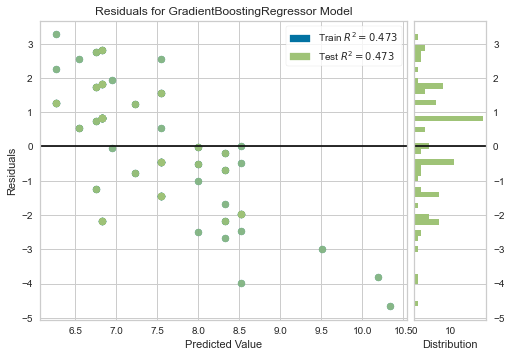

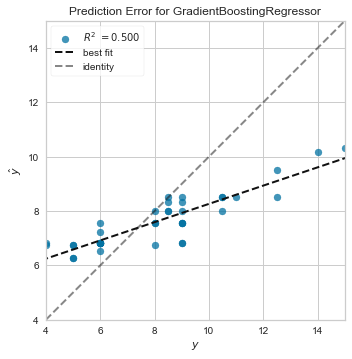

In [28]:
models = [
    LinearRegression(),
    Ridge(alpha=2),
    SGDRegressor(max_iter=100),
    KernelRidge(alpha=2),
    SVR(),
    RandomForestRegressor(n_estimators=5),
    GradientBoostingRegressor(n_estimators=5)
]


def visualize_model(X, y, estimator, **kwargs):
    viz = ResidualsPlot(estimator, **kwargs)
    viz.fit(X.values, y)
    viz.score(X.values, y)
    viz.show()

    viz = PredictionError(model)
    viz.fit(X_train.values, y_train)
    viz.score(X_test.values, y_test)
    viz.show()

for model in models:
    visualize_model(X, y, model)

#### **SPECIFIC MODEL TUNING**

In [30]:
model = RandomForestRegressor(n_estimators=5)

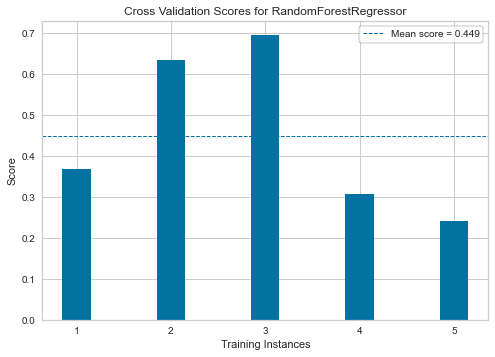

In [31]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
viz = cv_scores(model, X, y, cv=cv, scoring='r2')

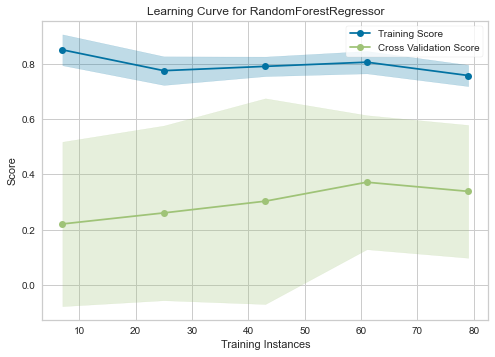

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [32]:
viz = LearningCurve(model, cv=cv, scoring='r2', )
viz.fit(X, y)
viz.show()

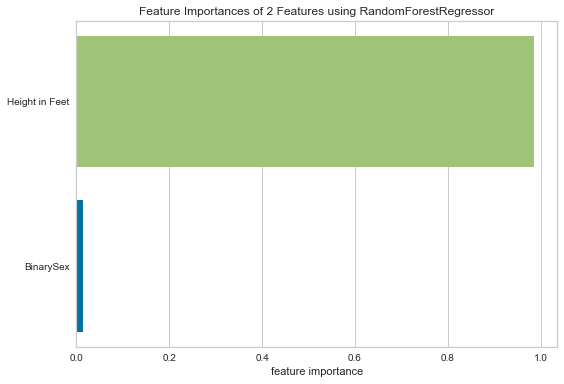

<AxesSubplot:title={'center':'Feature Importances of 2 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [33]:
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X, y)
viz.show()

##### **RANDOM FOREST REGRESSOR HYPERPARAMETER TUNING**

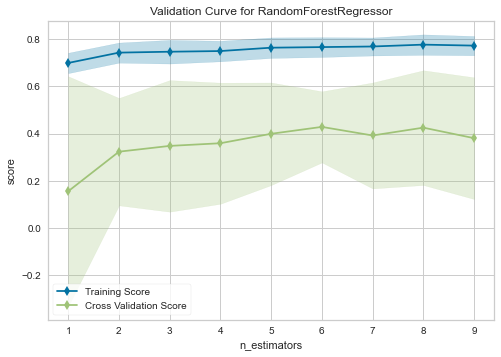

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='n_estimators', ylabel='score'>

In [34]:
viz = ValidationCurve(RandomForestRegressor(), param_name='n_estimators', param_range=range(1, 10), cv=cv, scoring='r2')
viz.fit(X, y)
viz.show()

##### **USE MODEL THAT HAS ALPHA AS PARAMETERS - RIDGE**

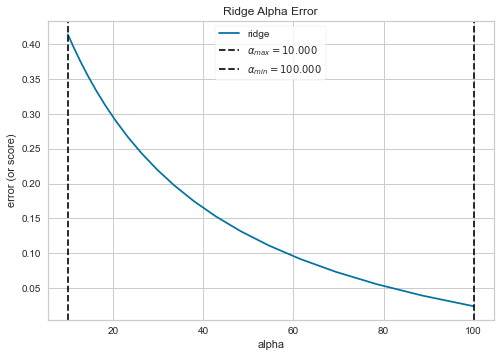

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [35]:
alphas = np.logspace(1, 2, 20)
viz = ManualAlphaSelection(Ridge(), alphas=alphas, cv=cv, scoring='r2')
viz.fit(X, y)
viz.show()

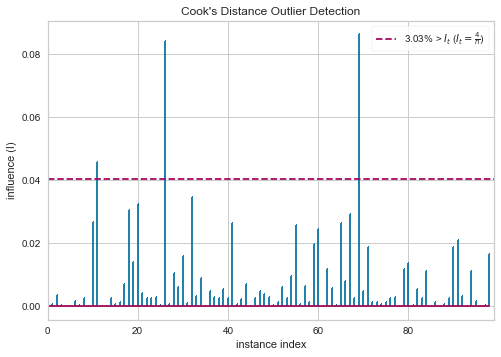

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [36]:
viz = CooksDistance()
viz.fit(X, y)
viz.show()